## Загрузка и первичный анализ данных

Для выполнения задания был предложен датасет с данными об образовании в США .

https://www.kaggle.com/noriuk/us-education-datasets-unification-project (файл states_all_extended.csv)

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
sns.set(style="ticks")

In [94]:
data = pd.read_csv('dataset/states_all_extended.csv', sep=",")
data.shape

(1715, 266)

In [22]:
data.dtypes

PRIMARY_KEY              object
STATE                    object
YEAR                      int64
ENROLL                  float64
TOTAL_REVENUE           float64
                         ...   
G08_AM_A_MATHEMATICS    float64
G08_HP_A_READING        float64
G08_HP_A_MATHEMATICS    float64
G08_TR_A_READING        float64
G08_TR_A_MATHEMATICS    float64
Length: 266, dtype: object

In [5]:
data

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,247.0,278.0,286.0,315.0,NaN,NaN,NaN,NaN,269.0,293.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,248.0,267.0,285.0,315.0,237.0,259.0,NaN,NaN,263.0,292.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.0,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,251.0,273.0,277.0,294.0,253.0,267.0,NaN,NaN,268.0,276.0


Колонки датасета
<ul>
    <li>PRIMARY_KEY - Комбинация года и названия штата </li>
    <li>YEAR</li>
    <li>STATE - Название штата</li>
    <li>ENROLL - Количество учащихся в штате </li>
</ul>
<ul>
    <li>TOTAL REVENUE - Общий доход </li>
    <li>FEDERAL_REVENUE - Федеральный доход </li>
    <li>STATE_REVENUE - Доход штата </li>
    <li>LOCAL_REVENUE - Доход местного управления </li>
    <li>TOTAL_EXPENDITURE - Общий расход </li>
    <li>INSTRUCTION_EXPENDITURE - Расход на образование</li>
    <li>SUPPORT_SERVICES_EXPENDITURE - Расход на вспомогательные услуги </li>
    <li>CAPITAL_OUTLAY_EXPENDITURE - Капитальный расход </li>
    <li>OTHER_EXPENDITURE - Прочие расходы </li>
</ul>
<ul>
    <li>A_A_A - Общее количество учащихся в штате </li>
    <li>G01_A_A - G12_A_A - Количество учащихся в 1 - 12 классе </li>
    <li>G01-G08_A_A - Количество учащихся с 1 по 8 класс </li>
    <li>G09-G12_A_A - Количество учащихся с 9 по 12 класс </li>
    <li>G06_AS_M - Число учащихся 6 класса мужского пола, этническая принадлежность которых "азиатская" </li>
    <li>G08_AS_A_READING - Средний балл чтения учащихся 8 класса, этническая принадлежность которых "азиатская" </li>
    <li>PK_A_A - Количество учащихся в ясельной группе детского сада </li>
    <li>KG_A_A - Количество учащихся в старшей группе детского сада </li>
</ul>

Проверим есть ли пропущенные значения

In [95]:
# Цикл по колонкам датасета с записью колонок с более 76% пустых значений
print('{:30} {:10} {}'.format('Колонка', 'Тип данных', 'Количество пустых значений'))
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count > 0:
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        if temp_perc > 76:
            cat_cols.append(col)
        print('{:30} {:10} {} {:10}%'.format(col, dt, temp_null_count, temp_perc))

Колонка                        Тип данных Количество пустых значений
ENROLL                         float64    491      28.63%
TOTAL_REVENUE                  float64    440      25.66%
FEDERAL_REVENUE                float64    440      25.66%
STATE_REVENUE                  float64    440      25.66%
LOCAL_REVENUE                  float64    440      25.66%
TOTAL_EXPENDITURE              float64    440      25.66%
INSTRUCTION_EXPENDITURE        float64    440      25.66%
SUPPORT_SERVICES_EXPENDITURE   float64    440      25.66%
OTHER_EXPENDITURE              float64    491      28.63%
CAPITAL_OUTLAY_EXPENDITURE     float64    440      25.66%
A_A_A                          float64    83       4.84%
G01_A_A                        float64    83       4.84%
G02_A_A                        float64    83       4.84%
G03_A_A                        float64    83       4.84%
G04_A_A                        float64    83       4.84%
G05_A_A                        float64    83       4.84%
G06_A_A  

G12_WH_M                       float64    1307      76.21%
KG_AM_F                        float64    1307      76.21%
KG_AM_M                        float64    1308      76.27%
KG_AS_F                        float64    1307      76.21%
KG_AS_M                        float64    1307      76.21%
KG_BL_F                        float64    1307      76.21%
KG_BL_M                        float64    1307      76.21%
KG_HI_F                        float64    1308      76.27%
KG_HI_M                        float64    1307      76.21%
KG_HP_F                        float64    1349      78.66%
KG_HP_M                        float64    1350      78.72%
KG_TR_F                        float64    1344      78.37%
KG_TR_M                        float64    1344      78.37%
KG_WH_F                        float64    1307      76.21%
KG_WH_M                        float64    1307      76.21%
PK_AM_F                        float64    1332      77.67%
PK_AM_M                        float64    1321      77.0

Имеется достаточное количество пропусков. Переходим к их обработке.

## Обработка пропусков

Все столбцы с данными о количестве учеников в классах и группах детского сада с учетом рассовой принадлежности имеют количество пропусков более 76%. Они не являются важными для обучения моделей и решения задачи регрессии. Поэтому избавимся от них. Список таких колонок хранится в массиве cat_cols.

In [96]:
data_reshape1 = data.drop(axis=1, columns=cat_cols).copy()

Посмотрим какие столбцы с пропущенными значениями остались

In [97]:
print('{:30} {:10} {}'.format('Колонка', 'Тип данных', 'Количество пустых значений'))
cat_cols2 = []
for col in data_reshape1.columns:
    # Количество пустых значений 
    temp_null_count = data_reshape1[data_reshape1[col].isnull()].shape[0]
    dt = str(data_reshape1[col].dtype)
    if temp_null_count > 0:
        temp_perc = round((temp_null_count / data_reshape1.shape[0]) * 100.0, 2)
        cat_cols2.append(col)
        print('{:30} {:10} {} {:10}%'.format(col, dt, temp_null_count, temp_perc))

Колонка                        Тип данных Количество пустых значений
ENROLL                         float64    491      28.63%
TOTAL_REVENUE                  float64    440      25.66%
FEDERAL_REVENUE                float64    440      25.66%
STATE_REVENUE                  float64    440      25.66%
LOCAL_REVENUE                  float64    440      25.66%
TOTAL_EXPENDITURE              float64    440      25.66%
INSTRUCTION_EXPENDITURE        float64    440      25.66%
SUPPORT_SERVICES_EXPENDITURE   float64    440      25.66%
OTHER_EXPENDITURE              float64    491      28.63%
CAPITAL_OUTLAY_EXPENDITURE     float64    440      25.66%
A_A_A                          float64    83       4.84%
G01_A_A                        float64    83       4.84%
G02_A_A                        float64    83       4.84%
G03_A_A                        float64    83       4.84%
G04_A_A                        float64    83       4.84%
G05_A_A                        float64    83       4.84%
G06_A_A  

На данном этапе количество столбцов заметно уменьшилось ив основном остались наиболее полные и информативные. На основании данных датасета мы можем сормулировать задачу регрессии, которая заключается в обучении модели для выявления зависимости оценок по предметам учеников 4 класа от общих затрат на образование.

Следовательно, целевыми признаками будут являться столбцы с оценками(баллами) по чтению и математике 4 класса.

В этих столбцах много пропусков, но их удалять нельзя, поэтому удалим строки с пропущенными в этих столбцах значениями.

In [98]:
data_new = data_reshape1.dropna(axis=0, subset=cat_cols2).copy()
print(data_new.shape)

(355, 42)


In [99]:
data_new.drop(['A_A_A','G01_A_A','G02_A_A','G03_A_A','G05_A_A','G06_A_A','G07_A_A','G08_A_A','G09_A_A','G10_A_A','G11_A_A','G12_A_A','KG_A_A','PK_A_A'], inplace=True, axis=1)

In [100]:
data_new.drop(['G01-G08_A_A','G09-G12_A_A','G04_A_M_READING','G04_A_M_MATHEMATICS','G04_A_F_READING','G04_A_F_MATHEMATICS'], inplace=True, axis=1)

In [101]:
data_new.drop(['G08_A_A_READING','G08_A_A_MATHEMATICS','G08_A_M_READING','G08_A_M_MATHEMATICS','G08_A_F_READING','G08_A_F_MATHEMATICS'], inplace=True, axis=1)

Удалим столбец PRIMARY_KEY - тк в нем нет необходимости.

In [102]:
data_new.drop(['PRIMARY_KEY'], inplace=True, axis=1)

In [103]:
print('{:30} {:10} {}'.format('Колонка', 'Тип данных', 'Количество пустых значений'))
for col in data_new.columns:
    # Количество пустых значений 
    temp_null_count = data_new[data_new[col].isnull()].shape[0]
    dt = str(data_new[col].dtype)
    temp_perc = round((temp_null_count / data_reshape1.shape[0]) * 100.0, 2)
    print('{:30} {:10} {} {:10}%'.format(col, dt, temp_null_count, temp_perc))

Колонка                        Тип данных Количество пустых значений
STATE                          object     0        0.0%
YEAR                           int64      0        0.0%
ENROLL                         float64    0        0.0%
TOTAL_REVENUE                  float64    0        0.0%
FEDERAL_REVENUE                float64    0        0.0%
STATE_REVENUE                  float64    0        0.0%
LOCAL_REVENUE                  float64    0        0.0%
TOTAL_EXPENDITURE              float64    0        0.0%
INSTRUCTION_EXPENDITURE        float64    0        0.0%
SUPPORT_SERVICES_EXPENDITURE   float64    0        0.0%
OTHER_EXPENDITURE              float64    0        0.0%
CAPITAL_OUTLAY_EXPENDITURE     float64    0        0.0%
G04_A_A                        float64    0        0.0%
G04_A_A_READING                float64    0        0.0%
G04_A_A_MATHEMATICS            float64    0        0.0%


In [104]:
data_new

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,G04_A_A,G04_A_A_READING,G04_A_A_MATHEMATICS
561,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,1521462.0,424662.0,432279.0,57323.0,207.0,223.0
562,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,514052.0,55715.0,247005.0,10115.0,212.0,233.0
563,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,1964229.0,303924.0,864642.0,76207.0,209.0,229.0
564,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,972598.0,170767.0,247245.0,34070.0,214.0,229.0
565,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,17030335.0,2995767.0,7341541.0,493415.0,206.0,227.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,5075509.0,627473.0,1086722.0,96851.0,229.0,247.0
1220,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,4510672.0,546926.0,1601069.0,82404.0,226.0,245.0
1221,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,1161944.0,233836.0,232738.0,19814.0,216.0,235.0
1222,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,3691809.0,513402.0,894823.0,60999.0,223.0,243.0


Теперь пропусков в данных нет.

Таким образом, получен фрагмент датасета размером в 355 строк и 15 колонок, допустимый по условию задачи. В датасете имеется один категориальный признак - столбец STATE. Закодируем его.

In [84]:
data_oe = data_new[['STATE']]

In [105]:
for col in range(0,100):
    print(data_new.iloc[col]['STATE'])

ALABAMA
ALASKA
ARIZONA
ARKANSAS
CALIFORNIA
COLORADO
CONNECTICUT
DELAWARE
DISTRICT_OF_COLUMBIA
FLORIDA
GEORGIA
HAWAII
IDAHO
ILLINOIS
INDIANA
IOWA
KANSAS
KENTUCKY
LOUISIANA
MAINE
MARYLAND
MASSACHUSETTS
MICHIGAN
MINNESOTA
MISSISSIPPI
MISSOURI
MONTANA
NEBRASKA
NEVADA
NEW_HAMPSHIRE
NEW_JERSEY
NEW_MEXICO
NEW_YORK
NORTH_CAROLINA
NORTH_DAKOTA
OHIO
OKLAHOMA
OREGON
PENNSYLVANIA
RHODE_ISLAND
SOUTH_CAROLINA
SOUTH_DAKOTA
TENNESSEE
TEXAS
UTAH
VERMONT
VIRGINIA
WASHINGTON
WEST_VIRGINIA
WISCONSIN
WYOMING
ALABAMA
ALASKA
ARIZONA
ARKANSAS
CALIFORNIA
COLORADO
CONNECTICUT
DELAWARE
DISTRICT_OF_COLUMBIA
FLORIDA
GEORGIA
HAWAII
IDAHO
ILLINOIS
INDIANA
IOWA
KANSAS
KENTUCKY
LOUISIANA
MAINE
MARYLAND
MASSACHUSETTS
MICHIGAN
MINNESOTA
MISSISSIPPI
MISSOURI
MONTANA
NEBRASKA
NEVADA
NEW_HAMPSHIRE
NEW_JERSEY
NEW_MEXICO
NEW_YORK
NORTH_CAROLINA
NORTH_DAKOTA
OHIO
OKLAHOMA
OREGON
PENNSYLVANIA
RHODE_ISLAND
SOUTH_CAROLINA
SOUTH_DAKOTA
TENNESSEE
TEXAS
UTAH
VERMONT
VIRGINIA
WASHINGTON
WEST_VIRGINIA


In [108]:
oe = OrdinalEncoder()
data_new['STATE'] = oe.fit_transform(data_new)
data_new

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,G04_A_A,G04_A_A_READING,G04_A_A_MATHEMATICS
561,0.0,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,1521462.0,424662.0,432279.0,57323.0,207.0,223.0
562,1.0,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,514052.0,55715.0,247005.0,10115.0,212.0,233.0
563,2.0,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,1964229.0,303924.0,864642.0,76207.0,209.0,229.0
564,3.0,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,972598.0,170767.0,247245.0,34070.0,214.0,229.0
565,4.0,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,17030335.0,2995767.0,7341541.0,493415.0,206.0,227.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,46.0,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,5075509.0,627473.0,1086722.0,96851.0,229.0,247.0
1220,47.0,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,4510672.0,546926.0,1601069.0,82404.0,226.0,245.0
1221,48.0,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,1161944.0,233836.0,232738.0,19814.0,216.0,235.0
1222,49.0,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,3691809.0,513402.0,894823.0,60999.0,223.0,243.0


Введем столбец со средним баллом учеников 4 класса за оба предмета: математику и чтение

In [109]:
data_new['G04_TEST'] = data_new.apply (lambda row: (row['G04_A_A_READING']+row['G04_A_A_MATHEMATICS'])/2, axis=1)

In [110]:
data_new.tail()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,G04_A_A,G04_A_A_READING,G04_A_A_MATHEMATICS,G04_TEST
1219,46.0,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,5075509.0,627473.0,1086722.0,96851.0,229.0,247.0,238.0
1220,47.0,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,4510672.0,546926.0,1601069.0,82404.0,226.0,245.0,235.5
1221,48.0,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,1161944.0,233836.0,232738.0,19814.0,216.0,235.0,225.5
1222,49.0,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,3691809.0,513402.0,894823.0,60999.0,223.0,243.0,233.0
1223,50.0,2015,93867.0,1962874.0,120290.0,1116917.0,725667.0,1942406.0,895910.0,565489.0,52520.0,409425.0,7551.0,228.0,247.0,237.5


Корелляционная матрица

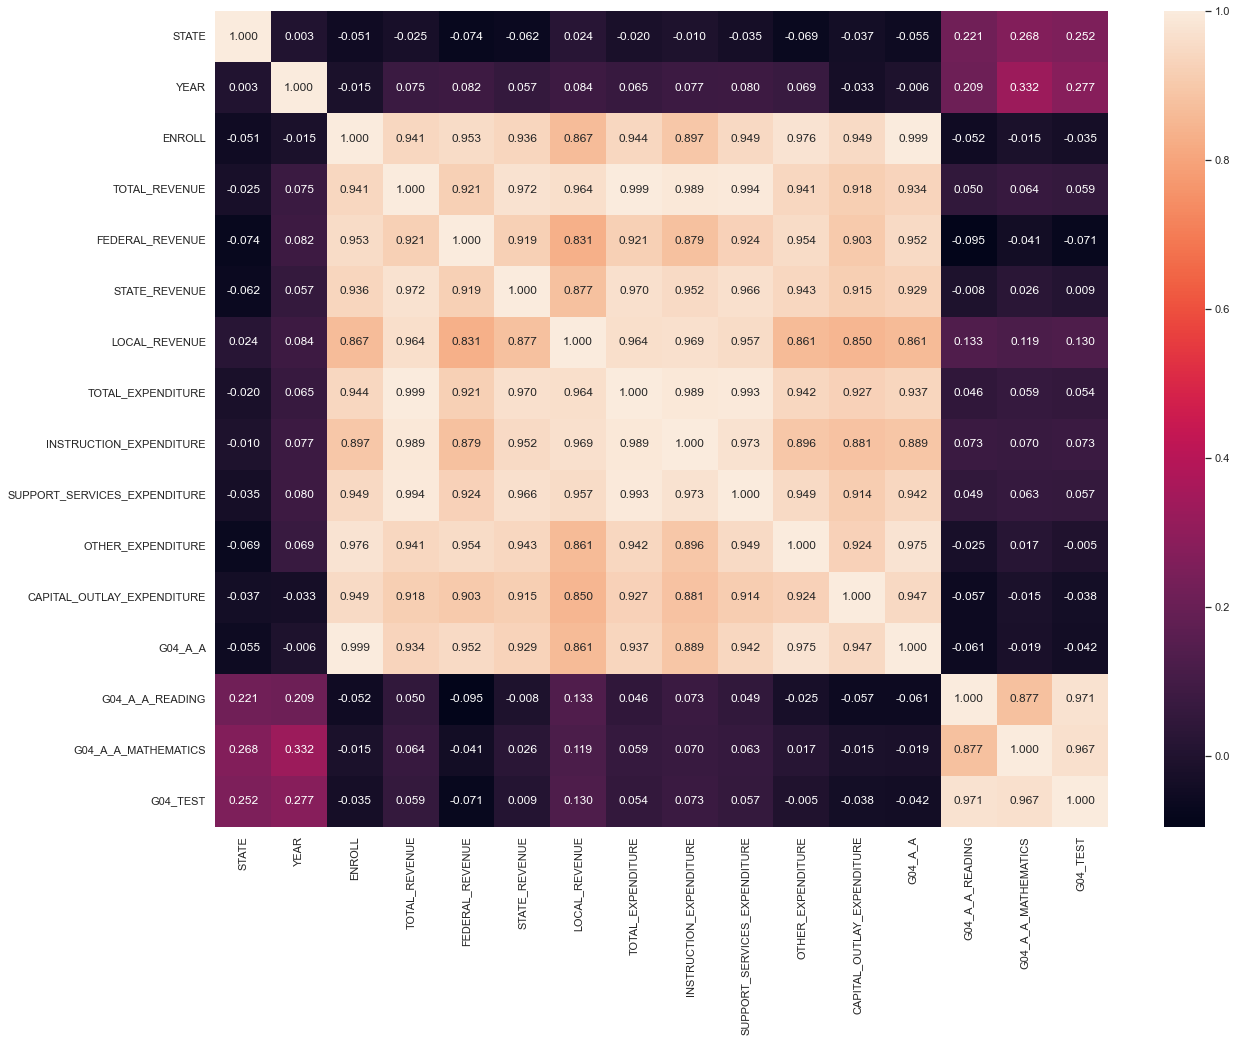

In [115]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(data_new.corr(), annot=True, fmt='.3f')

### Разделение выборки на обучающую и тестовую

In [116]:
y=np.array(data_new["G04_TEST"])
X=np.array(data_new.drop(["G04_TEST"], axis=1))
X, y

(array([[0.00000e+00, 2.00300e+03, 7.27900e+05, ..., 5.73230e+04,
         2.07000e+02, 2.23000e+02],
        [1.00000e+00, 2.00300e+03, 1.33303e+05, ..., 1.01150e+04,
         2.12000e+02, 2.33000e+02],
        [2.00000e+00, 2.00300e+03, 8.75111e+05, ..., 7.62070e+04,
         2.09000e+02, 2.29000e+02],
        ...,
        [4.80000e+01, 2.01500e+03, 2.79565e+05, ..., 1.98140e+04,
         2.16000e+02, 2.35000e+02],
        [4.90000e+01, 2.01500e+03, 8.61813e+05, ..., 6.09990e+04,
         2.23000e+02, 2.43000e+02],
        [5.00000e+01, 2.01500e+03, 9.38670e+04, ..., 7.55100e+03,
         2.28000e+02, 2.47000e+02]]),
 array([215. , 222.5, 219. , 221.5, 216.5, 229.5, 234.5, 230. , 196.5,
        226. , 222. , 217.5, 226.5, 224.5, 229. , 230.5, 231. , 224. ,
        215.5, 231. , 226. , 235. , 227.5, 232.5, 214. , 228.5, 229.5,
        228.5, 217.5, 235.5, 232. , 213. , 229. , 231.5, 230. , 230. ,
        221.5, 227. , 227.5, 223. , 225.5, 229.5, 220. , 226. , 227. ,
        234. , 231

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,shuffle=True)

### Обучение моделей

In [120]:
# Дерево решений
DTR = DecisionTreeRegressor(random_state=1)
DTR.fit(X_train, y_train)

DTR_mse = mean_squared_error(y_test, DTR.predict(X_test), squared = True)
DTR_r2 = r2_score(y_test, DTR.predict(X_test))

In [123]:
# Случайный лес
RF = RandomForestRegressor(random_state=1)
RF.fit(X_train, y_train)

RF_mse = mean_squared_error(y_test, RF.predict(X_test), squared = True)
RF_r2 = r2_score(y_test, RF.predict(X_test))

### Оценка моделей

Для оценки моделей будем использовать метрики:

#### Mean squared error - средняя квадратичная ошибка - 

    выбрана для вычисления погрешности прогноза

#### Метрика  𝑅2  или коэффициент детерминации - 

    выбрана для оценки степени соответствия и меры того, насколько хорошо  выборки могут быть предсказаны моделью через долю объясненной дисперсии.

Все метрики выбраны для оценки задачи регрессии.

In [131]:
# Вывод метрик
print('{:20} {:>20} {:>20}'.format('','Дерево решений', 'Случайный лес'))
print('{:20} {:20} {:21}'.format('mean_squared_error', DTR_mse, RF_mse))
print('{:20} {:20} {:20}'.format('r2_score', DTR_r2, RF_r2))

                           Дерево решений        Случайный лес
mean_squared_error      1.560747663551402   0.45064275700934486
r2_score               0.9687356201174011   0.9909728736582422


### Выводы

По результатам оценок обеих метрик можно сделать вывод о том, что модель 'Случайный лес' обучена лучше.